In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [2]:
#Predicting Google's stock price
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
#Feature Scaling
#Normalising it
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
#creating a structure with 60 timesteps and 1 output. Looking at 60 previous values
#X-train will contain 60 stock prices. y_train will contain 1 day after that
X_train = []
y_train = []
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [5]:
#Reshaping it
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))#adding a dimension for indicator

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [7]:
#Initialising RNN
regressor = Sequential()

In [8]:
# Adding first lstm layer and regularisation(Dropout)

regressor.add(LSTM(units = 50, return_sequences=True, input_shape=(X_train.shape[1], 1))) #return_sequences set to true for stacked LSTM layers
regressor.add(Dropout(0.2)) #Dropping 20% neurons in the layers

In [9]:
#Adding second LSTM Layer with regularisation(Dropout)
regressor.add(LSTM(units = 50, return_sequences=True)) #No need to add input layer since units automatically tells 
regressor.add(Dropout(0.2))

In [10]:
#Adding third LSTM layer
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))

In [11]:
#Adding fourth LSTM layer
regressor.add(LSTM(units = 50)) #return_sequences to be removed since we are not returning anything else
regressor.add(Dropout(0.2))

In [12]:
#Op layer
regressor.add(Dense(units=1))

In [13]:
#Compile
regressor.compile(optimizer='adam',loss='mean_squared_error')#can use rmsprop also as optimizer

In [14]:
#Fitting the RNN. Usually cry at this point due to my PC
regressor.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
38/38 [==============================] - 5s 137ms/step - loss: 0.0367
Epoch 2/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0059
Epoch 3/100
38/38 [==============================] - 5s 132ms/step - loss: 0.0055
Epoch 4/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0048
Epoch 5/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0052
Epoch 6/100
38/38 [==============================] - 4s 101ms/step - loss: 0.0050
Epoch 7/100
38/38 [==============================] - 4s 98ms/step - loss: 0.0046
Epoch 8/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0045
Epoch 9/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0043
Epoch 10/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0045
Epoch 11/100
38/38 [==============================] - 6s 148ms/step - loss: 0.0047
Epoch 12/100
38/38 [==============================] - 6s 146ms/step - loss: 0.0044
Epoch 13/100
3

38/38 [==============================] - 7s 185ms/step - loss: 0.0013
Epoch 100/100
38/38 [==============================] - 6s 147ms/step - loss: 0.0013


In [15]:
#Getting the test set
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [19]:
#Getting predicted stock price
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) -60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price) #to remove transformation

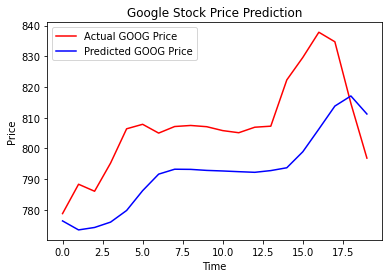

In [22]:
#Visualising results
plt.plot(real_stock_price,color='red',label='Actual GOOG Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted GOOG Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [24]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print(rmse)

18.4951246671885
